In [201]:
import os
import re
import math
import glob

from sklearn.linear_model import LinearRegression
from scipy.integrate import simps
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

# Manual Data

In [2]:
cd /Users/Logan/Google Drive/hampton_creek/data/manual

/Users/Logan/Google Drive/hampton_creek/data/manual


In [3]:
ls

15-07-17 DSC Prep #29-33 validation.xlsx        15-08-12 DSC Prep 29-52 validation.xlsx
15-07-22 DSC Prep #34-40 & POS validation.xlsx  ~$15-08-12 DSC Prep 29-52 validation.xlsx


In [4]:
xl = pd.read_excel('15-08-12 DSC Prep 29-52 validation.xlsx',skiprows = 2)

In [5]:
[(i, c) for i, c in enumerate(xl.columns)]

[(0, u'Pan layout #'),
 (1, u'Isolate ID'),
 (2, u'mg sample'),
 (3, u'Total Pan Weight before (mg)'),
 (4, u'Total Pan weight after (mg)'),
 (5, u'Total Pan weight difference: abs(D-E)'),
 (6, u'Peak1 Type'),
 (7, u'Tm Peak 1 (\u02daC)'),
 (8, u'Enthalpy Peak 1 (J/g)'),
 (9, u'Peak Width: (wide (w)=15-20\u02daC; sharp (s)<15\u02daC)'),
 (10, u'Comments/Notes'),
 (11, u'File/Export Data File//File Signal Only '),
 (12, 'Unnamed: 12'),
 (13, 'Unnamed: 13'),
 (14, 'Unnamed: 14'),
 (15, 'Unnamed: 15'),
 (16, 'Unnamed: 16'),
 (17, 'Unnamed: 17'),
 (18, 'Unnamed: 18'),
 (19, 5.333333333333333)]

In [6]:
xl = xl.iloc[:,:11]

In [7]:
names = list(xl.columns)
names[7] = 'temp_peak_1'
xl.columns = names

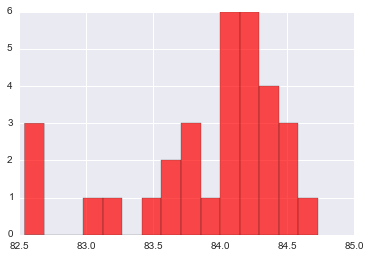

In [8]:
xl[xl.temp_peak_1 > 80].temp_peak_1.hist(bins = 15, color = 'r', alpha = 0.7)

# Cleaning Raw Data

In [18]:
cd /Users/Logan/Google Drive/hampton_creek/data/raw/all_preps

/Users/Logan/Google Drive/hampton_creek/data/raw/all_preps


In [19]:
ls

29.txt      36.txt      43.txt      48.txt      P 29.002    P 32.txt    P 37_1.txt  P36_2.txt
30.txt      37.txt      44.txt      49.txt      P 30.002    P 33.002    P 38_1.txt  P37_2.txt
31.txt      39.txt      45.txt      50.txt      P 31.002    P 33.003    P 39_1.txt  P38_2.txt
33.txt      40.txt      46.txt      51.txt      P 31.txt    P 34_1.txt  P 40_1.txt  P39_2.txt
34.txt      41.txt      47.txt      52.txt      P 32.002    P 36_1.txt  P34_2.txt   P40_2.txt


In [20]:
p29 = pd.read_table('29.txt', skiprows = 49, encoding='utf-16', delimiter='\t')
p29.reset_index(inplace = True)
colnames = ['time', 'temp', 'heat_flow', 'purge_flow']
p29.columns = colnames

In [21]:
p29.head()

,time,temp,heat_flow,purge_flow
0,0.000333,39.97708,0.250503,49.98050
1,0.003667,39.97626,0.250567,50.01996
2,0.007000,39.97648,0.250630,49.98844
3,0.010333,39.97678,0.250693,50.02194
4,0.013667,39.97676,0.250754,49.99720


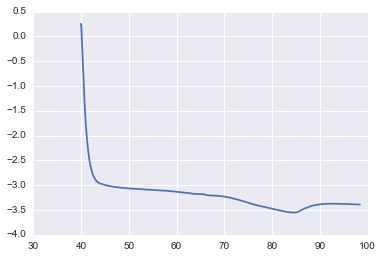

In [22]:
sb.plt.plot(p29.temp, p29.heat_flow)

# Plotting figures

In [23]:
def clean_file(filepath):
    f = pd.read_table(filepath, skiprows = 49, encoding='utf-16', delimiter='\t')
    f.reset_index(inplace = True)
    colnames = ['time', 'temp', 'heat_flow', 'purge_flow']
    f.columns = colnames
    return f

In [24]:
def plot_file(filepath):
#     sb.set_style('ticks')
    f = clean_file(filepath)
    sb.plt.plot(f.temp, f.heat_flow, color = 'r', alpha = 0.8)

In [25]:
def plot_files(filenames):
    d1 = int(math.floor(np.sqrt(len(filenames))))
    d2 = d1 + 1
    dims = int(str(d1) + str(d2))*10
    i = 1
    sb.set_style('ticks')
    for f in filenames:
        sb.plt.figure(i)
        sb.plt.subplot(dims + i)
        plot_file(f)
        i += 1
    sb.plt.close()

In [62]:
def plot_chart(data):
    sb.plt.plot(data.temp, data.heat_flow)
    sb.plt.show()

In [43]:
# filenames = [f for f in glob.glob("/Users/Logan/Google Drive/hampton_creek/data/raw/all_preps/*.txt")]
filenames = [f for f in glob.glob("*.txt")]

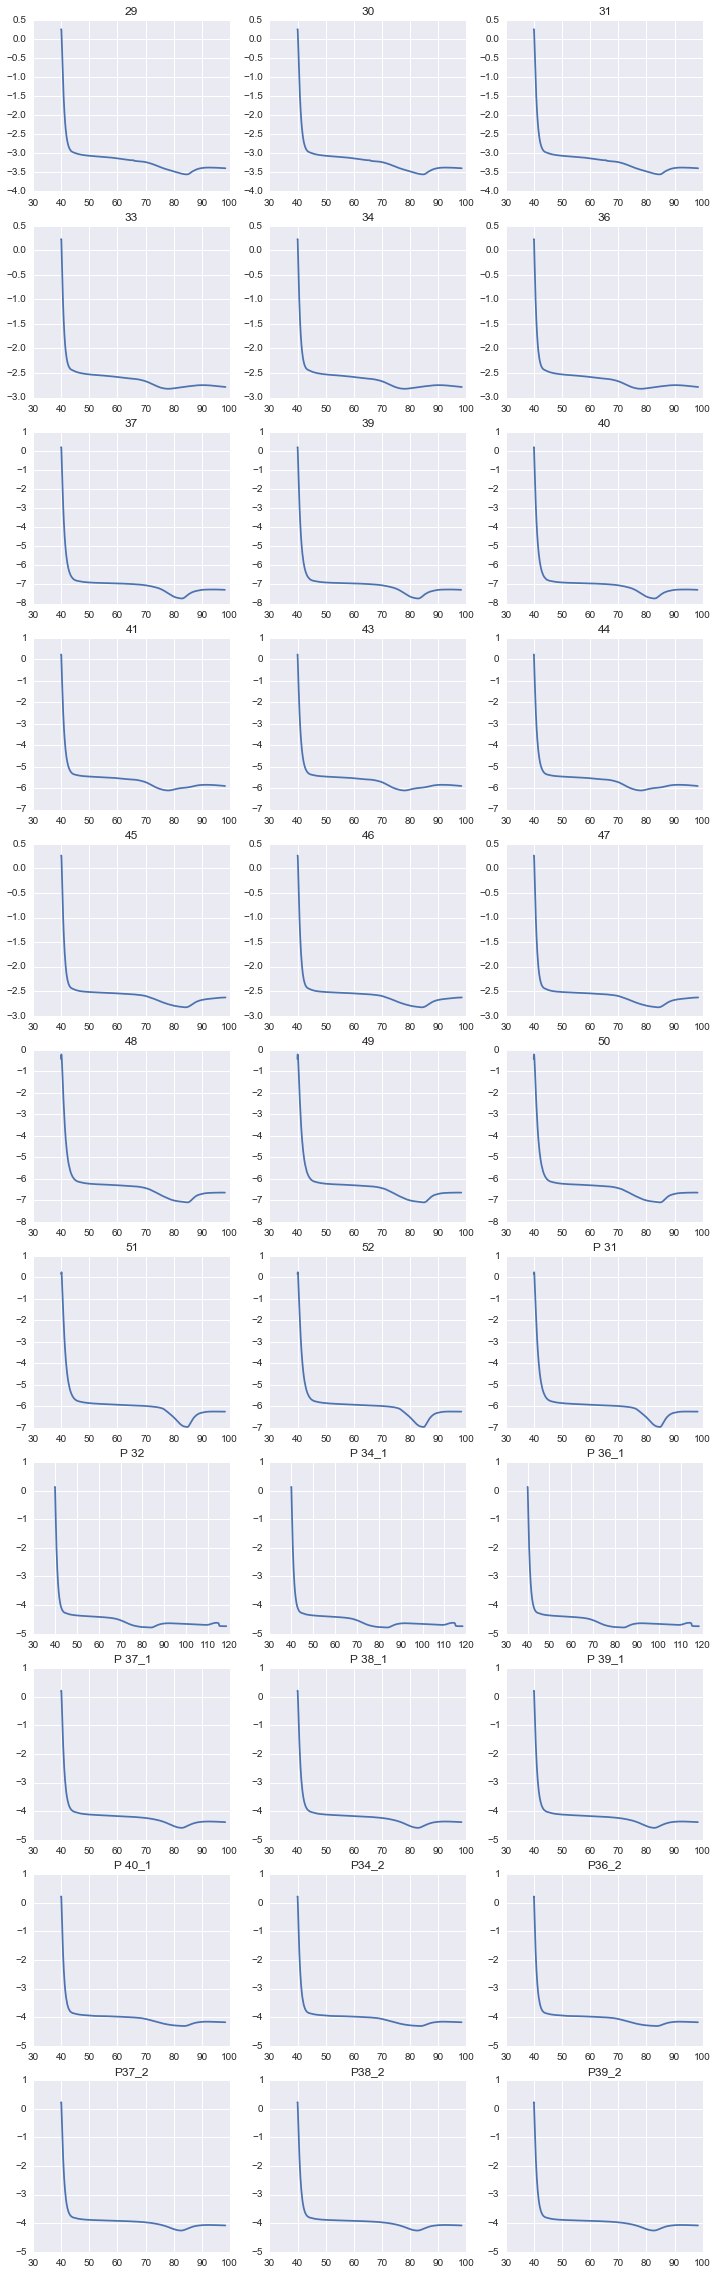

In [167]:
def plot_all_files(filenames, nrows, save = False):
    fig, axes = sb.plt.subplots(nrows, 3, figsize=(12,40))

    i = 0
    for row in axes:
        for r in xrange(3):
            if i + r < len(filenames):
                f = clean_file(filenames[i])
                x, y = f.temp, f.heat_flow
                row[r].plot(x, y)
                title = re.findall('(.*?).txt', filenames[i + r])[0]
                row[r].set_title(title)
        i += 3
    if save:
        sb.plt.savefig('all_plots.png')
    sb.plt.show()

plot_all_files(filenames, 11)


In [162]:
def plot_preloaded():
    filenames = [f for f in glob.glob("*.txt")]
    plot_all_files(filenames, 11)
    

# First Model

In [49]:
f = clean_file(filenames[0])

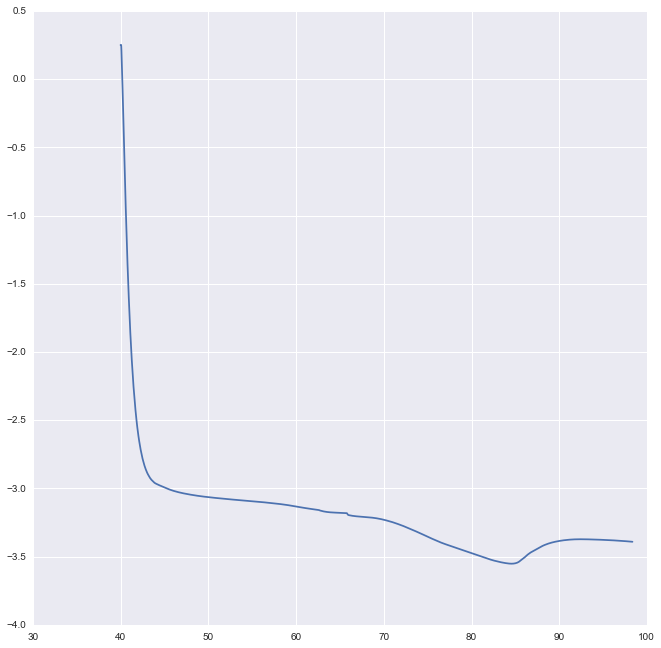

In [104]:
sb.plt.figure(figsize=(11,11))
sb.plt.plot(f.temp, f.heat_flow)

In [223]:
sample = f[(f.temp > 50) & (f.temp < 95)]

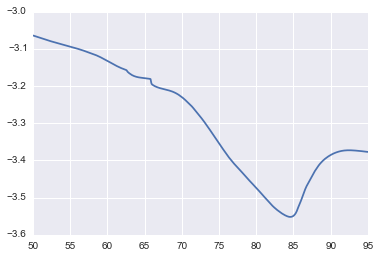

In [224]:
sb.plt.plot(sample.temp, sample.heat_flow)

In [1]:
subset = sample[(sample.temp < 60) | (sample.temp > 92)]

NameError: name 'sample' is not defined

In [237]:
X, y = subset.temp[:,np.newaxis], subset.heat_flow[:,np.newaxis]

In [238]:
lm = LinearRegression()

In [239]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
b, m = lm.intercept_[0], lm.coef_[0][0]

In [241]:
def get_line(intercept, slope, min_x, max_x, size):
    xs = np.linspace(min_x, max_x, size)
    y = intercept + slope*xs
    return xs, y

In [242]:
x, y = get_line(b, m, min(sample.temp), max(sample.temp), len(sample))

* **f: full**
* **sample: crop**
* **x, y: regression line__**

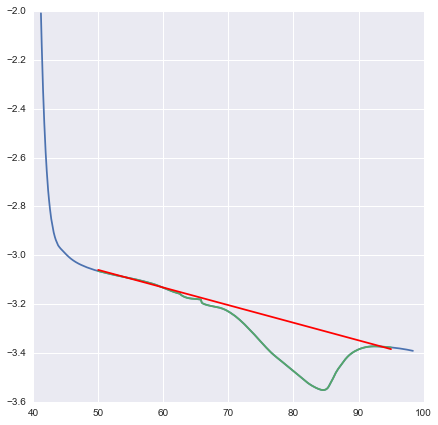

In [243]:
sb.plt.figure(figsize = (7, 7))
sb.plt.plot(f[f.heat_flow < -2.0].temp, f[f.heat_flow < -2.0].heat_flow)
sb.plt.plot(sample.temp, sample.heat_flow)
sb.plt.plot(x, y, color = 'r')

In [244]:
negs = sample.copy()
negs.heat_flow = -negs.heat_flow

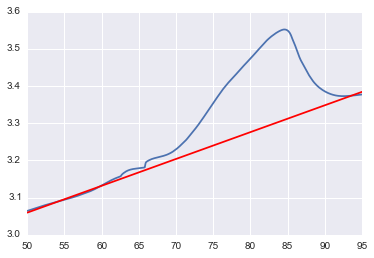

In [245]:
sb.plt.plot(negs.temp, negs.heat_flow)
sb.plt.plot(x, -y, color = 'r')

# First results

In [246]:
crude_integration = np.sum(negs.heat_flow + y)
crude_integration

183.42593309934023

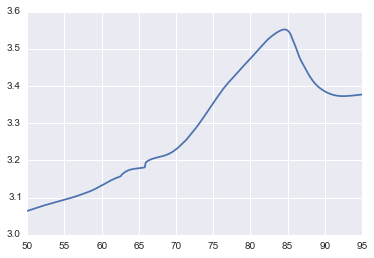

In [247]:
sb.plt.plot(negs.temp, negs.heat_flow)

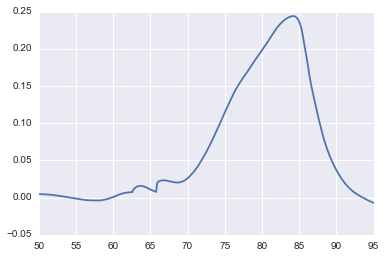

In [248]:
sb.plt.plot(sample.temp, -(sample.heat_flow - y))

In [159]:
round(negs.temp[np.argmax(negs.heat_flow)], 3)

84.555

In [250]:
temp = f.temp

# Crude Model

1. Find arbitrary temperature cutoffs
2. Find a best fit line
3. Take integral of the difference (Simpson's rule)
4. Optimize cutoffs

*Note – __you can use Simpson's rule__, or any other estimation rule, because the time measurements are made at consistent intervals (the spread about the mean is +0.2% and -0.1% of the mean).*

# Simpson's Rule Examination

In [221]:
diffs = -(sample.heat_flow - y)
simps_integration = simps(diffs)
print "Simpson's Rule area:", simps_integration
print "Diff between Simps, Crude: {0}%".format(round(100*((simps_integration - crude_integration)/crude_integration), 5))

Simpson's Rule area: 187.220980454
Diff between Simps, Crude: -0.00011%


*Very small difference in values... however, suitability depends on variance of all energy releases*

# Pipeline

In [315]:
def get_energy_release(temp, heat_flow):
    """
    INPUT: array, array
    OUTPUT: float

    For a given heat flow signature over a range of temperatures, return
    the total amount of energy released.
    """
    # get appropriate line-fitting subset of data
    mask = (temp > 50) & ((temp < 60) | (temp > 92)) ## NOTE: Arbitrary cutoff
    temp_subset = temp[mask].T[np.newaxis, :]
    heat_subset = heat_flow[mask].T[np.newaxis, :]

    # fit a line
    lm = LinearRegression()
    lm.fit(temp_subset, heat_subset)
    X_actual, y_predicted = get_line_from_model(lm,
                                                min(temp_subset),
                                                max(temp_subset),
                                                len(temp_subset))

    # generate line, actual differences
    differences = -(heat_subset - y_predicted) # negative assuming endothermic
    return simps(differences)

In [323]:
def get_line_from_model(model, min_x, max_x, size):
    """
    INPUT: sklearn linear model, numeric, numeric, int
    OUTPUT: array, array

    Get X and y values of some arbitrary line from an sklearn model
    """
    X = np.linspace(min_x, max_x, size)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    y = intercept + slope * X
    return X, y